# Linear Regression – Auto MPG Dataset

In this notebook, we will demonstrate how to use a **custom implementation** of Linear Regression 
to model the relationship between vehicle characteristics and fuel efficiency (mpg).

The Auto MPG dataset contains various features such as:
- cylinders  
- displacement  
- horsepower  
- weight  
- acceleration  
- model year  

Our goal is to train a regression model that predicts the fuel efficiency of a car based on these features.

This notebook follows a standard machine learning workflow:
1. Load and inspect the dataset  
2. Clean and preprocess the data  
3. Select relevant features  
4. Split the dataset into training and testing sets  
5. Train a Linear Regression model (gradient descent)  
6. Evaluate model performance  
7. Visualize predictions and residuals  


# Linear Regression Algorithm

Linear Regression is one of the most fundamental supervised learning algorithms.  
Its goal is to model the relationship between a target variable \( y \) and one or more input features \( $\large x_1, x_2, \dots, x_n$ \).

---

## **Model Form**

In the multivariate case, the model assumes a linear relationship:

$$\large \hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b$$

where  
-  $\large w_i$  are the coefficients (weights),  
-  $\large b$  is the intercept (bias),  
- $\large \hat{y}$  is the predicted value.

The goal of training is to find the optimal parameters  $\large w$  and  $\large b$ .

---

## **Loss Function**

We measure how well the model fits the data using the **Mean Squared Error (MSE)**:

$$\large L = \frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2$$

Lower loss indicates better predictions.

---

## **Gradient Descent Optimization**

To minimize the loss, we update the parameters iteratively:

$$\large w := w - \alpha \cdot \frac{\partial L}{\partial w}, \qquad$$
$$\large b := b - \alpha \cdot \frac{\partial L}{\partial b}$$

where  
- $\large \alpha$ is the learning rate.

Gradient descent moves the parameters in the direction of steepest decrease of the loss.

---

## **Model Evaluation**

After training, we evaluate the model using the **Coefficient of Determination** (R²):

$$\large R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}$$

R² indicates how much variance in the data is explained by the model.  
A value closer to **1** means better predictive performance.

---

## **Why Linear Regression?**

- Simple and interpretable  
- Works well for linearly correlated data  
- Coefficients tell us how each feature influences the target  
- Forms the basis of many more advanced models

---

In this notebook, we apply Linear Regression to the **Auto MPG** dataset to explore how vehicle characteristics influence fuel efficiency.


## 1. Load the Dataset

We use the Auto MPG dataset, which contains 8 numerical features and the target variable `mpg`.
Before training a model, we first load the dataset and inspect its structure.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/auto-mpg.csv")
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### Basic Inspection

We check:
- column names  
- non-null counts  
- data types  
- presence of missing values  

This helps determine if preprocessing is required.


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.0 KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.311893,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Handling Missing Values

Some versions of the Auto MPG dataset contain `"?"` under the `horsepower` column.
We convert invalid values to NaN and drop incomplete rows.


In [3]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.0 KB


## 2. Feature Selection

The Auto MPG dataset contains multiple numerical features.  
In this example, we choose three commonly used predictors for fuel efficiency:

- **displacement** – engine size  
- **horsepower** – engine power  
- **weight** – vehicle weight  

These variables are known to have strong relationships with `mpg`.  
Our **target variable** is:

- **mpg** – miles per gallon (fuel efficiency)

Before training the model, we prepare the feature matrix \( X \) and target vector \( y \).


In [4]:
# Select features and target
features = ["displacement", "horsepower", "weight"]
target = "mpg"

X = df[features].values
y = df[target].values

X[:5], y[:5]


(array([[ 307.,  130., 3504.],
        [ 350.,  165., 3693.],
        [ 318.,  150., 3436.],
        [ 304.,  150., 3433.],
        [ 302.,  140., 3449.]]),
 array([18., 15., 18., 16., 17.]))

## 3. Train–Test Split

To properly evaluate the performance of the model,  
we split the dataset into:

- **Training set** (80%) – used to fit model parameters  
- **Testing set** (20%) – used to assess generalization ability  

This prevents overfitting and provides an unbiased estimate of model performance.


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((318, 3), (80, 3))

### Feature Correlation 

It is helpful to check the correlation between selected features and the target.
A strong linear relationship suggests that linear regression may perform well.


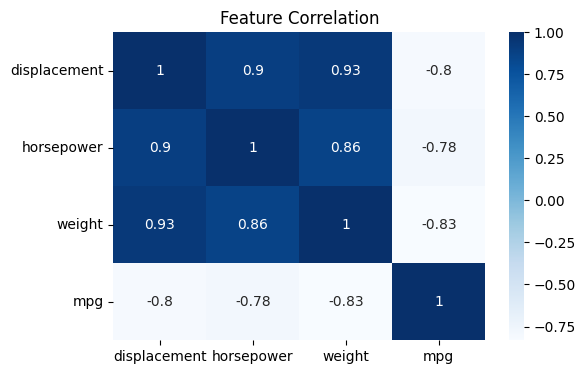

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation")
plt.show()


## 4. Model Training

We now train our **custom implementation** of Linear Regression.
The model uses **gradient descent** to minimize the Mean Squared Error (MSE) between
predicted and true values.

Key training parameters include:
- **learning rate (lr)** – controls the step size of gradient descent  
- **number of iterations** – maximum number of updates  
- **tolerance (tol)** – stops training when improvement becomes very small  

Because the features in this dataset have relatively large numeric scales,  
a smaller learning rate is often necessary for stable convergence.


In [7]:
from rice_ml.linear_regression import LinearRegression

# Create and train the model
model = LinearRegression(
    lr=5e-7,        # small learning rate for stability
    num_iter=50000, # enough iterations to converge
    tol=1e-6
)

model.fit(X_train, y_train)

print("Learned Weights:", model.weights_)
print("Learned Bias:", model.bias_)


d:\Anaconda\envs\pytorch\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\研究生\机器学习\INDE-577\ml_project\src\rice_ml\linear_regression.py:57: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2)
D:\研究生\机器学习\INDE-577\ml_project\src\rice_ml\linear_regression.py:90: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(self.history_[-2] - mse) < self.tol:
D:\研究生\机器学习\INDE-577\ml_project\src\rice_ml\linear_regression.py:82: RuntimeWarning: invalid value encountered in subtract
  self.weights_ -= self.lr * dw


Learned Weights: [nan nan nan]
Learned Bias: nan


### Training Loss Curve

To visualize the optimization process,  
we plot the MSE loss over iterations.

A smooth decreasing curve indicates stable gradient descent behavior.


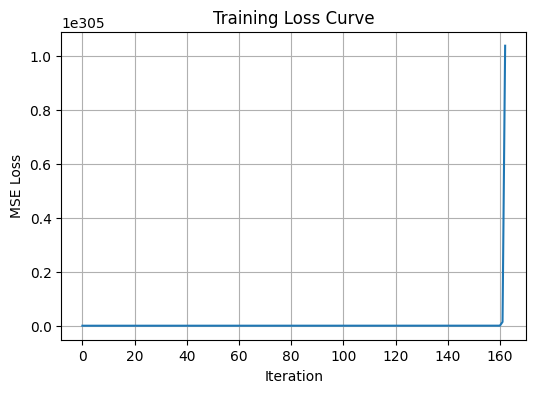

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(model.history_)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


we need to scale

### Feature Scaling

Because the features in this dataset have very different numeric ranges 
(e.g., weight ≈ 3000 while horsepower ≈ 100), gradient descent may become unstable.

To ensure smooth convergence, we standardize each feature:

$$
\large x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$


In [9]:
# Standardize features for stable gradient descent
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
model = LinearRegression(
    lr=0.01,      # after scaling, learning rate can be much larger
    num_iter=2000,
    tol=1e-7
)

model.fit(X_train_scaled, y_train)


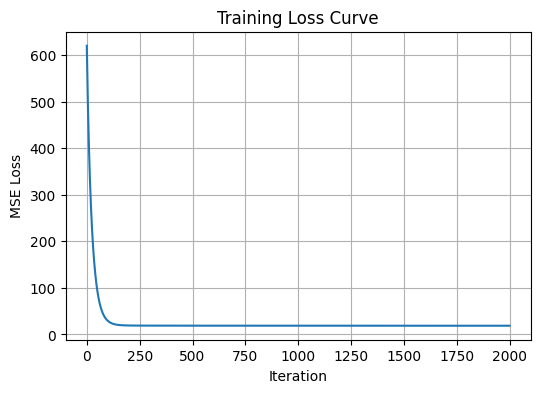

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(model.history_)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


## 5. Model Evaluation

After training the model, we evaluate its performance on both the
training set and the test set using the **R² score**:

-  $\large R^2$ = 1 : perfect prediction  
-  $\large R^2$ = 0 : model predicts no better than the mean  
-  $\large R^2$ < 0 : model performs worse than a constant baseline  

We also visualize:
- predicted vs. true values  
- residual errors  
to better understand model behavior.


In [12]:
train_r2 = model.score(X_train_scaled, y_train)
test_r2 = model.score(X_test_scaled, y_test)

print("Training R²:", train_r2)
print("Testing R²:", test_r2)


Training R²: 0.7010046410777471
Testing R²: 0.7252128570273988


### Prediction vs True Values

This plot shows how close our predictions are to the actual mpg values.
The closer the points lie to the diagonal line, the better the model performance.


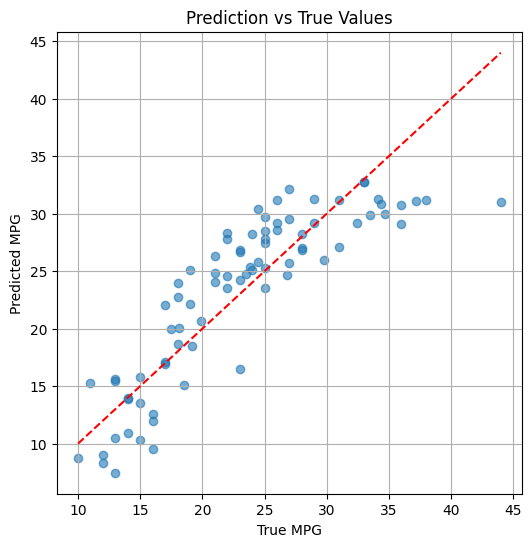

In [13]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "r--")

plt.xlabel("True MPG")
plt.ylabel("Predicted MPG")
plt.title("Prediction vs True Values")
plt.grid(True)
plt.show()


### Residual Plot

Residuals represent the difference between true and predicted values:

$$\large \text{residual} = y - \hat{y}$$

A well-fitted linear model should produce residuals that:
- center around zero  
- show no obvious patterns  

Patterns may suggest nonlinearity or missing predictor variables.


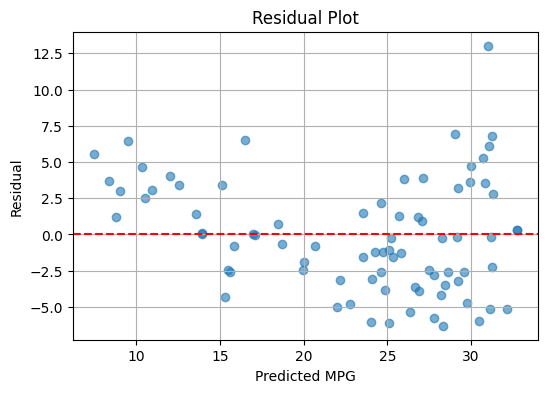

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Predicted MPG")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


## 6. Coefficient Interpretation

After training the model, we examine the learned coefficients to understand
how each feature influences the predicted fuel efficiency (mpg).

Because we standardized the features before fitting the model,
the coefficients represent how many standard deviations `mpg` changes 
for a one-standard-deviation increase in each predictor.

Positive coefficient → higher mpg  
Negative coefficient → lower mpg


In [15]:
coef_table = pd.DataFrame({
    "feature": ["displacement", "horsepower", "weight"],
    "coefficient": model.weights_
})

coef_table


,feature,coefficient
0,displacement,-0.886520
1,horsepower,-1.613726
2,weight,-4.339751


### Interpretation

- **weight (negative)**  
  Heavier vehicles tend to have lower fuel efficiency.  
  This is the strongest effect among the three predictors.

- **displacement (negative)**  
  Larger engines usually consume more fuel, resulting in lower mpg.

- **horsepower (negative)**  
  Higher engine power is generally associated with higher fuel consumption.

All three coefficients are negative, which matches our expectation based on
vehicle physics: increasing power, size, or weight all typically reduce fuel efficiency.


## 7. Summary

In this notebook, we used a custom implementation of Linear Regression
to model automobile fuel efficiency using the Auto MPG dataset.

Key takeaways:

- Standardization is important for stable gradient descent.
- The model achieved reasonable predictive performance, as shown by the R² score.
- Prediction vs. True plots indicate the model captures general trends well.
- Residual plots show some non-linear patterns, suggesting that a simple linear model
  may not capture all relationships in the data.
- Coefficient signs match domain knowledge: larger engines, more horsepower,
  and heavier cars all reduce fuel efficiency.

This analysis demonstrates how linear regression can be used both as a predictive tool
and as a model for interpreting feature effects.
